In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# get training data
dfx=pd.read_csv('C:\\Users\\ADMIN\\Desktop\\Mayuri\\linear regression\\Test.csv')
dfy=pd.read_csv('C:\\Users\\ADMIN\\Desktop\\Mayuri\\linear regression\\Train.csv')
print(dfx)
dfx=dfx.values
dfy=dfy.values
x=dfx.reshape([-1,1])
y=dfy.reshape([-1,1])
print([x.shape,y.shape])
print(dfx)
print(x)

     feature_1  feature_2  feature_3  feature_4  feature_5
0     1.015254   2.076209  -0.266435  -2.418088  -0.980503
1    -0.375021   0.953185   0.626719   0.704406  -0.355489
2    -1.024452   0.962991  -0.407942  -1.861274   0.455201
3    -2.489841   0.544802   0.601219  -0.607021  -1.314286
4    -0.384675  -0.833624   1.358552  -0.547932   0.411925
..         ...        ...        ...        ...        ...
395  -0.436959  -0.575844  -1.620908  -0.222588   1.086013
396  -0.421324  -2.417543   0.876275   0.844565   0.171646
397   0.554728   1.768243  -0.897787  -1.193661   0.340563
398  -1.627172   0.856471  -0.000566   0.629387   0.453382
399   0.139310   0.531597  -0.853107   0.031692   1.714893

[400 rows x 5 columns]
[(2000, 1), (9600, 1)]
[[ 1.01525387e+00  2.07620944e+00 -2.66434820e-01 -2.41808820e+00
  -9.80502790e-01]
 [-3.75021204e-01  9.53184528e-01  6.26719138e-01  7.04405750e-01
  -3.55489211e-01]
 [-1.02445225e+00  9.62991107e-01 -4.07942004e-01 -1.86127383e+00
   4.5520

In [62]:
print(y,type(y))

[[   0.29341624]
 [  -0.94559871]
 [  -0.42110515]
 ...
 [   0.48861308]
 [   1.4595758 ]
 [-115.93900296]] <class 'numpy.ndarray'>


Shape of x: (2000, 1)
Shape of y: (2000, 1)


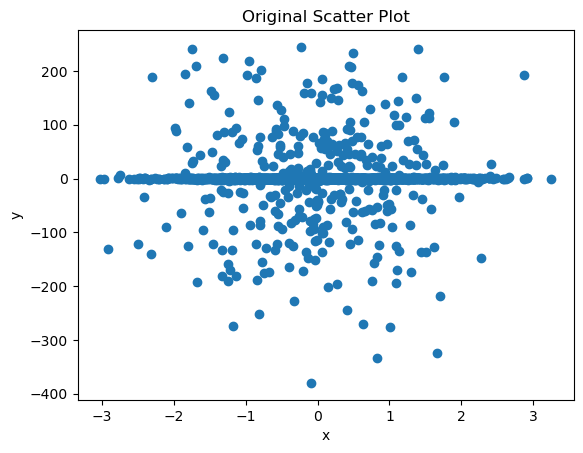

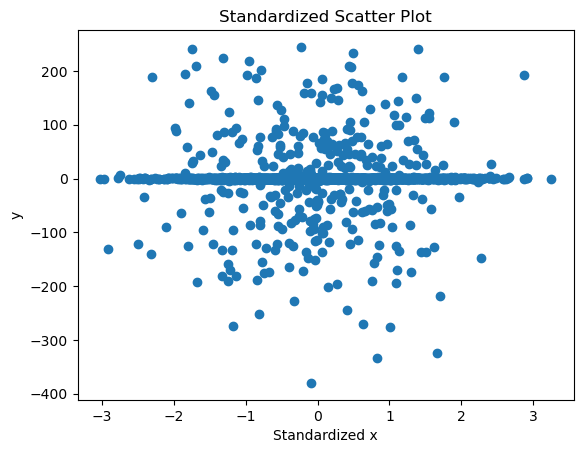

In [64]:
x = dfx.reshape(-1, 1)
y = dfy.reshape(-1, 1)

# Determine the minimum size
min_size = min(len(x), len(y))

# Truncate to the minimum size
x = x[:min_size]
y = y[:min_size]

# Check the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

# Convert x to a NumPy array and standardize
x = np.array(x)
x = (x - x.mean()) / x.std()

# Plot the original scatter plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Scatter Plot')
plt.show()

# Plot the standardized scatter plot
plt.scatter(x, y)
plt.xlabel('Standardized x')
plt.ylabel('y')
plt.title('Standardized Scatter Plot')
plt.show()

In [66]:
def hypothesis(x,theta):
    return theta[0] + theta[1] * x

In [68]:
def error(x,y,theta):
    error=0
    for i in range(x.shape[0]):
        hx= hypothesis(x[i],theta)
        error +=(hx-y[i])**2
    return error    

In [70]:
def gradient(x,y,theta):
    grad= np.zeros(2,)
    for i  in range(x.shape[0]):
         hx= hypothesis(x[i],theta)
         grad[0]+=(hx-y[i])
         grad[1]+=(hx-y[i])*x[i]

    return grad

In [72]:
def gradientDescent(x,y,learning_rate=0.001):
    # random theta
    theta=np.array([-2.0,0.0])
    max_iteration=100
    itr=0

    error_list=[]
    theta_list=[]
    while(itr<=max_iteration):
        grad = gradient(x,y,theta)
        err  = error(x,y,theta) 
        error_list.append(err)
        theta_list.append(theta)
        theta[0]-=learning_rate*grad[0]
        theta[1]-=learning_rate*grad[1]
        itr+=1
    return theta,error_list ,theta_list

In [82]:
final_theta, error_list,theta_list = gradientDescent(x,y)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15736\1077665184.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0]+=(hx-y[i])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15736\1077665184.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1]+=(hx-y[i])*x[i]


[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


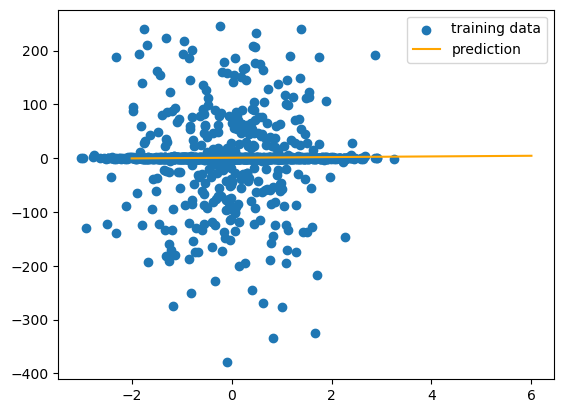

In [83]:

#plot line for testinf data
xtest =np.linspace(-2,6,10)
print(xtest)

# Check if x and y are the same size
if len(x) == len(y):
    plt.scatter(x, y, label='training data')
    plt.plot(xtest, hypothesis(xtest, final_theta), color='orange', label='prediction')
    plt.legend()
    plt.show()
else:
    print("Error: x and y must be the same size.")

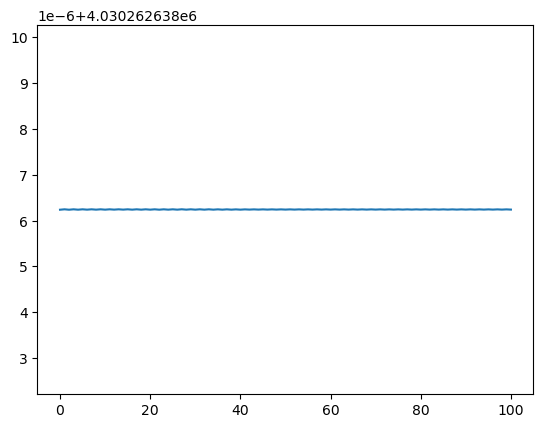

In [84]:
plt.plot(error_list)
plt.show()

In [88]:
print(final_theta)

[0.70752304 0.60838227]


In [90]:
#plot line for testinf data
xtest =np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


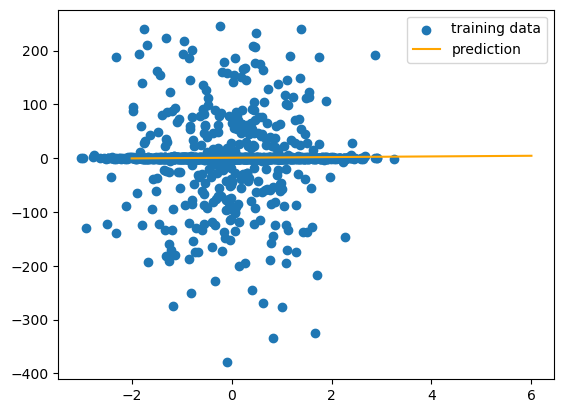

In [92]:
#plot data set
if len(x) == len(y):
    plt.scatter(x, y, label='training data')
    plt.plot(xtest, hypothesis(xtest, final_theta), color='orange', label='prediction')
    plt.legend()
    plt.show()
else:
    print("Error: x and y must be the same size.")